# Exploring 

In [24]:
from pyld import jsonld
import json
import os.path
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

import json
from pyld import jsonld
import os, sys
import urllib
import contextlib

devnull = open(os.devnull, 'w')
contextlib.redirect_stderr(devnull)

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

from IPython.display import JSON


In [10]:
def read_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            json_data = json.load(file)
        return json_data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: The file at {file_path} does not contain valid JSON.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None

In [61]:
dg = read_json_file("../datagraphs/starwman_datagraph.json")
fg = read_json_file("../frames/strawman_frame.json")
framed = jsonld.frame(dg, fg)
# viz

In [65]:
pretty_json = json.dumps(framed, indent=4)
print(pretty_json)

{
    "@context": {
        "@vocab": "https://schema.org/",
        "dateCreated": "https://schema.org/date",
        "geosparql": "http://www.opengis.net/ont/geosparql#"
    },
    "@id": "https://example.org/genid/data",
    "@type": "Dataset",
    "geosparql:hasGeometry": {
        "@id": "https://example.org/genid/data/geosparql",
        "@type": "http://www.opengis.net/ont/sf#Point",
        "geosparql:asWKT": {
            "@type": "geosparql:wktLiteral",
            "@value": "POINT(-76 -18)"
        },
        "geosparql:crs": {
            "@id": "http://www.opengis.net/def/crs/OGC/1.3/CRS84"
        }
    },
    "description": {
        "@language": "en",
        "@value": "oih/oih-wis2 dataset hosted on Hugging Face and contributed by the HF Datasets community"
    },
    "geoblob": {
        "@id": "https://example.org/genid/data/geoblob",
        "geometries": {
            "@id": "https://example.org/genid/data/geoblob/point",
            "coordinates": [
              

In [66]:
# print(framed)
display(JSON(framed))


<IPython.core.display.JSON object>

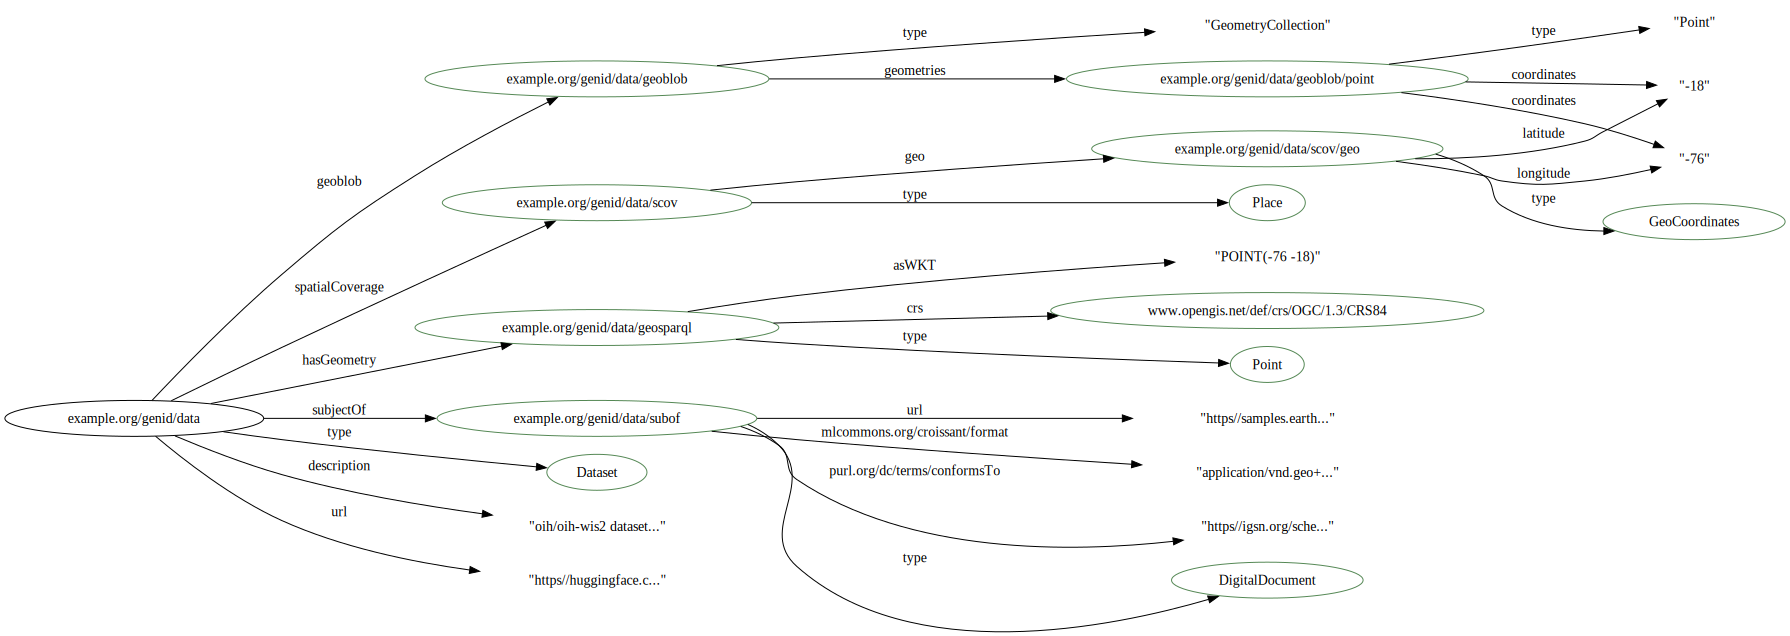

In [67]:
jbutils.show_graph(framed)
